# **MÓDULO 21 - AULA 4**
# Implementação prática de Árvores de decisão em Python

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

Vamos trabalhar com nossa base de Churn da empresa de crédito, a mesma que aplicamos ao modelo do naive bayes.


**Recapitulando:**

As bases de treino são as que usamos para treinar nosso modelo, na primeira etapa da modelagem.

Teste são as bases que usamos para testar o modelo já treinado e ver como ele se ajusta a dados que ele ainda não conhece.

As bases de X sempre terão todas features, todas variáveis do modelo, exceto a target que será a prevista.
As bases y terão apenas a target, que nesse caso é churn.

In [4]:
X_test = pd.read_csv("X_test.csv", delimiter=',')
X_train = pd.read_csv("X_train_balanced.csv", delimiter=',')
y_test = pd.read_csv("y_test.csv", delimiter=',')
y_train = pd.read_csv("y_train_balanced.csv", delimiter=',')

Sempre importante verificarmos se dentro das bases de X não temos a variável target (y) a que será prevista.
E se todas nossas variáveis estão já transformadas.

Outro fator importante é garantir que X test e y test tem o mesmo número de linhas, assim como y e x train.

In [5]:
X_test

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Genero_encoded,Pais_encoded
0,686,36.0,3,95848.58,2,0.0,1.0,7144694.0,1,0
1,703,35.0,1,0.00,1,1.0,1.0,14136462.0,1,0
2,730,26.0,6,0.00,1,1.0,1.0,1011687.0,1,2
3,675,33.0,6,0.00,2,0.0,1.0,1011687.0,0,0
4,754,24.0,3,121513.31,2,0.0,1.0,1011687.0,0,1
...,...,...,...,...,...,...,...,...,...,...
24922,786,37.0,4,0.00,2,0.0,1.0,1011687.0,0,2
24923,592,35.0,7,122724.50,1,1.0,1.0,17773874.0,1,0
24924,645,45.0,7,121286.32,1,1.0,1.0,869372.0,1,0
24925,567,47.0,1,126447.40,1,1.0,0.0,1011687.0,0,1


In [6]:
y_test

,Churn
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
24922,0.0
24923,0.0
24924,0.0
24925,1.0


In [7]:
y_train

,Churn
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
117945,1.0
117946,1.0
117947,1.0
117948,1.0


In [8]:
contagem_classes = y_train.value_counts()

print("Contagem de amostras por classe:")
print(contagem_classes)

Contagem de amostras por classe:
Churn
0.0      58975
1.0      58975
Name: count, dtype: int64


In [9]:
X_train

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Genero_encoded,Pais_encoded
0,711,35.000000,10,0.000000,2,1.000000,0.000000,5331178.0,1,0
1,619,33.000000,7,0.000000,2,0.000000,1.000000,1011687.0,1,0
2,841,54.000000,4,102721.490000,1,1.000000,1.000000,1011687.0,1,1
3,679,48.000000,6,125161.240000,1,1.000000,0.000000,579659.0,1,0
4,656,42.000000,6,0.000000,3,0.000000,0.000000,14233155.0,0,0
...,...,...,...,...,...,...,...,...,...,...
117945,529,43.000000,7,0.000000,1,0.514157,0.000000,1011687.0,1,2
117946,639,44.450575,7,0.000000,1,1.000000,0.725287,1011687.0,0,2
117947,541,49.890057,6,102744.063633,1,1.000000,0.000000,1011687.0,0,1
117948,593,37.911470,5,139949.785268,1,1.000000,0.000000,1011687.0,0,1


Já estamos cientes de que nosso problema se encaixa em uma classificação, pois queremos classificar quais dos nossos clientes serão churns ou não.

# **1 - Construindo o algoritmo de treino:**

Iremos implementar nosso algoritmo da árvore de decisão a base de treino:

In [10]:
from sklearn.tree import DecisionTreeClassifier # Bilioteca que é a implementação de árvores de decisão disponível no scikit-learn.

In [11]:
arvore_churn = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
#arvore_churn é o nome que escolho para meu classificador
# 'criterion' define o critério para medir a qualidade da divisão (usando o índice de Gini neste caso)
# 'random_state' define a semente aleatória para garantir a reprodutibilidade dos resultados
arvore_churn.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

O parâmetro random_state é usado em muitos algoritmos de aprendizado de máquina em scikit-learn para garantir a reprodutibilidade dos resultados.

Quando você treina um modelo de aprendizado de máquina em um conjunto de dados, o algoritmo pode ter alguns componentes aleatórios, como a divisão dos dados em conjuntos de treinamento e teste, inicialização de pesos em redes neurais, embaralhamento de dados em algumas etapas, entre outros.

O random_state permite que você controle essa aleatoriedade. Quando você fornece um valor específico para random_state, o algoritmo realizará todas as operações aleatórias exatamente da mesma maneira sempre que for executado com o mesmo random_state. Isso é útil para garantir a consistência dos resultados, especialmente quando você está comparando diferentes modelos ou executando experimentos de forma repetida.

**Vamos verificar os parâmetros da nossa árvore:**

In [12]:
print(arvore_churn.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


ccp_alpha: Este é o parâmetro de poda. Controla o custo de complexidade-complexidade poda (CCP). Valores maiores de ccp_alpha incentivam a poda, o que pode levar a uma árvore mais simples, evitando o overfitting.

class_weight: Peso associado às classes. Pode ser usado para lidar com conjuntos de dados desequilibrados, dando mais peso às classes menos representadas.

criterion: O critério usado para medir a qualidade da divisão em cada nó da árvore. 'gini' para índice de Gini ou 'entropy' para ganho de informação.

max_depth: A profundidade máxima da árvore. Controla a profundidade máxima que a árvore pode atingir. Limitar a profundidade pode ajudar a evitar overfitting.

max_features: O número máximo de características a serem consideradas ao procurar a melhor divisão. Pode ser um número ou uma proporção das características.

max_leaf_nodes: O número máximo de folhas na árvore. Limita o crescimento da árvore, ajudando a evitar overfitting.

min_impurity_decrease: Um nó será dividido se a divisão resultante diminuir a impureza ponderada por pelo menos esse valor.

min_samples_split: O número mínimo de amostras necessárias para dividir um nó interno. Controla o número mínimo de amostras necessárias para realizar uma divisão.

min_weight_fraction_leaf: A fração ponderada do número total de amostras que deve ser em uma folha.

random_state: O estado aleatório usado para dividir os dados em conjuntos de treinamento e teste. Garante reprodutibilidade dos resultados.

splitter: A estratégia usada para escolher a divisão em cada nó. 'best' para escolher a melhor divisão ou 'random' para escolher uma divisão aleatória entre as melhores divisões.


**Esses parâmetros são ajustáveis e podem ser ajustados para otimizar o desempenho do modelo em seu conjunto de dados específico. Experimentar diferentes valores para esses parâmetros pode ajudar a encontrar a configuração que melhor se adapta aos seus dados e requisitos de modelagem.**

Abaixo podemos dar uma rápida olhada nas previsões para a base de teste:

In [13]:
previsoes = arvore_churn.predict(X_train[:10])
previsoes

array([1., 0., 1., 1., 1., 0., 0., 0., 1., 0.])

In [14]:
y_train

,Churn
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
117945,1.0
117946,1.0
117947,1.0
117948,1.0


# **2 - Aplicando nosso modelo a base de teste e avaliando os resultados:**

In [15]:
from sklearn.metrics import accuracy_score, classification_report

In [16]:
previsoes = arvore_churn.predict(X_test)
acuracia = accuracy_score(y_test, previsoes)
print("Acurácia:", acuracia)

Acurácia: 0.789986761343122


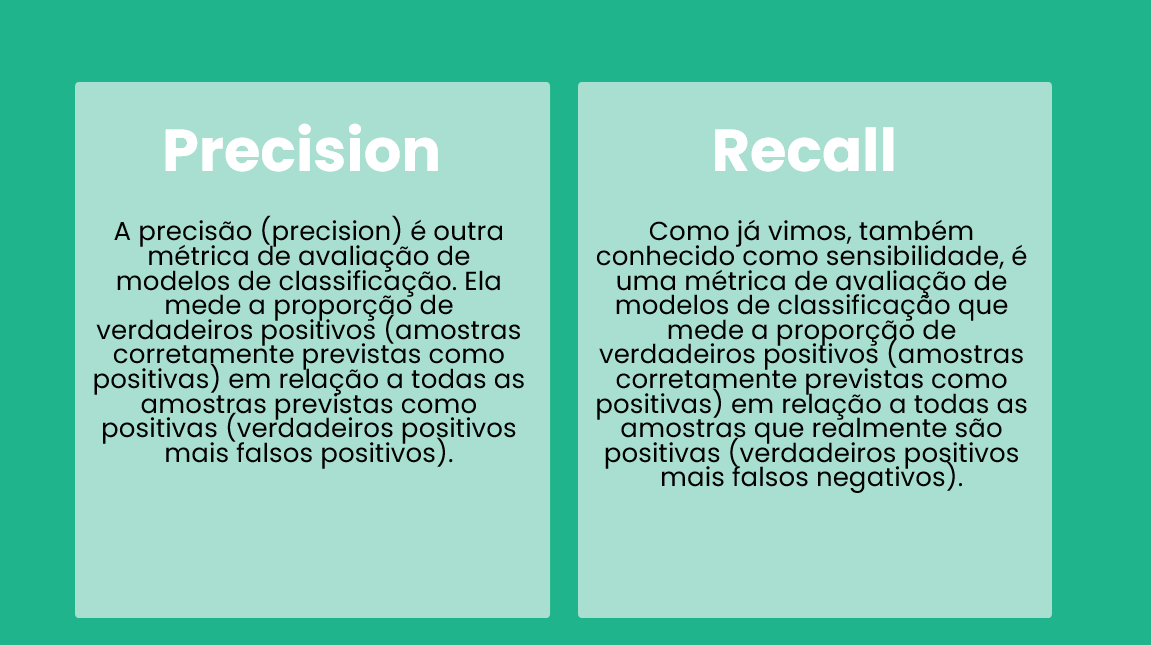

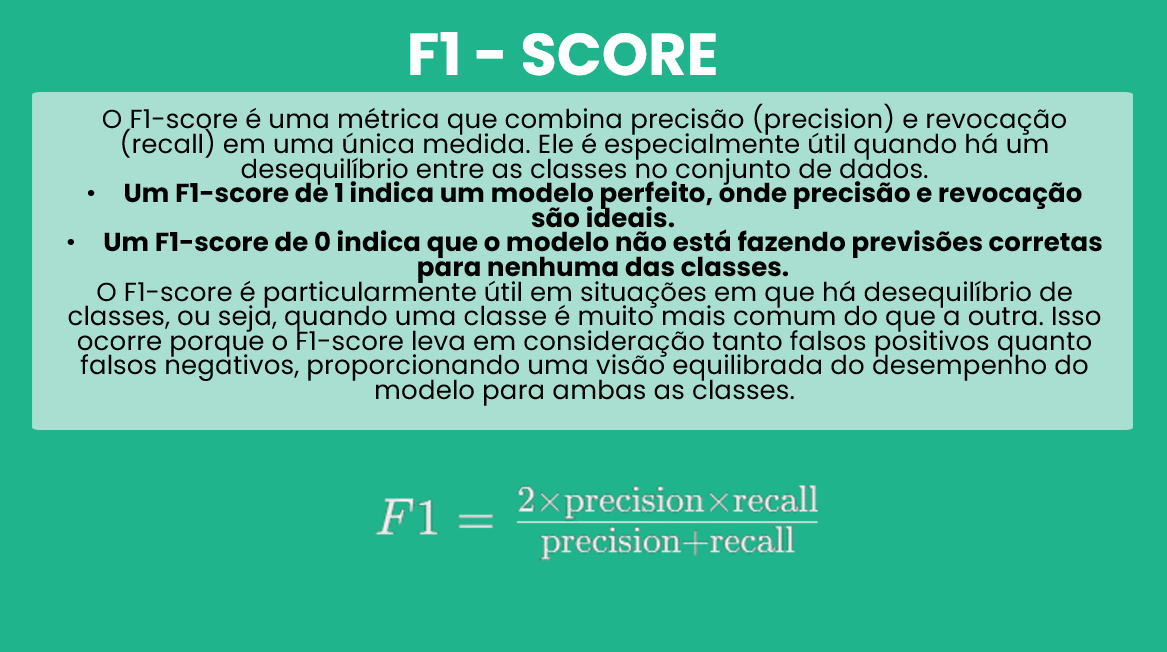

In [17]:
relatorio = classification_report(y_test, previsoes)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86     19649
         1.0       0.50      0.56      0.53      5278

    accuracy                           0.79     24927
   macro avg       0.69      0.71      0.70     24927
weighted avg       0.80      0.79      0.79     24927



* Para a classe 0 (0.0): A precisão é de 88%, o que
significa que 88% das amostras previstas como pertencentes à classe 0 realmente são da classe 0.
* Para a classe 1 (1.0): A precisão é de 50%, indicando que apenas metade das amostras previstas como pertencentes à classe 1 realmente são da classe 1.

* Para a classe 0 (0.0): A revocação é de 85%, indicando que o modelo identificou corretamente 85% das amostras da classe 0.
* Para a classe 1 (1.0): A revocação é de 56%, indicando que o modelo identificou corretamente 56% das amostras da classe 1.

* A acurácia global do modelo é de 79%, o que significa que 79% de todas as previsões do modelo estão corretas.

A média (avg) ponderada (weighted average) das métricas de precisão, recall e F1-score é de 0.80 para a classe 0 e 0.79 para a classe 1.
A média ponderada leva em consideração o desequilíbrio entre as classes, ponderando as métricas com base no número de amostras em cada classe.


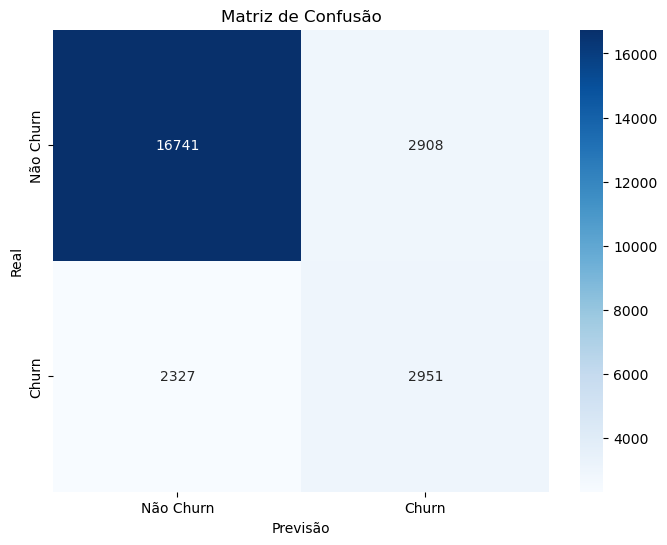

In [18]:
matriz_confusao = confusion_matrix(y_test, previsoes)

# Plotando a matriz de confusão como um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Não Churn', 'Churn'],
            yticklabels=['Não Churn', 'Churn'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

Notamos valores de métricas bem melhores que no modelo de naive bayes:
* Complexidade do Modelo: Os modelos de árvore de decisão são mais flexíveis e podem capturar relações mais complexas entre as variáveis de entrada e a variável de saída, enquanto o Naive Bayes assume independência condicional entre as variáveis de entrada. Portanto, se houver interações complexas entre as variáveis, a árvore de decisão pode ter um desempenho melhor.
* Assunções de Independência: O Naive Bayes assume independência condicional entre as variáveis de entrada, o que pode não ser realista em todos os conjuntos de dados. Se as variáveis de entrada estiverem correlacionadas, o modelo Naive Bayes pode não ser capaz de capturar essas relações, levando a um desempenho inferior.

# **MÓDULO 21 - AULA 5**
# Implementação prática de Árvores de decisão em Python: Aprimorando

Como nossa árvore de decisão é grande e temos muitos nós, esse código tende a demorar.

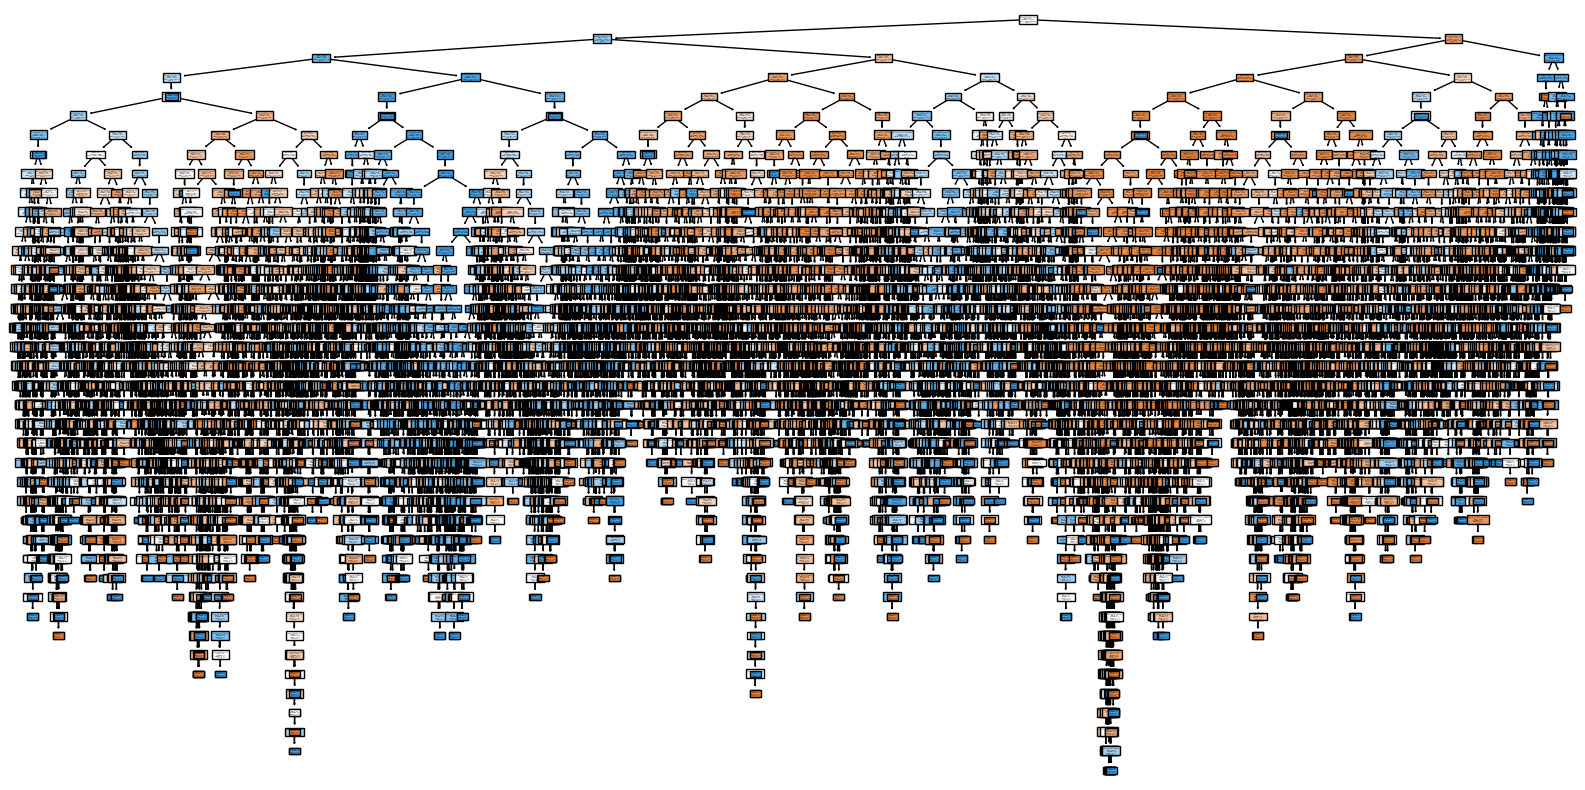

In [19]:
plt.figure(figsize=(20,10))
plot_tree(arvore_churn, filled=True, feature_names=X_train.columns, class_names=['0', '1'])
plt.show()

Vejam como a visualização da nossa árvore é dificil. Pois temos muitas instâncias nesse modelo.
A grande vantagem da árvore de decisão é a clareza das classificações por conta da visualização da árvore mas em módulos com muitas features e mais complexos como o nosso, perdemos essa vantagem.

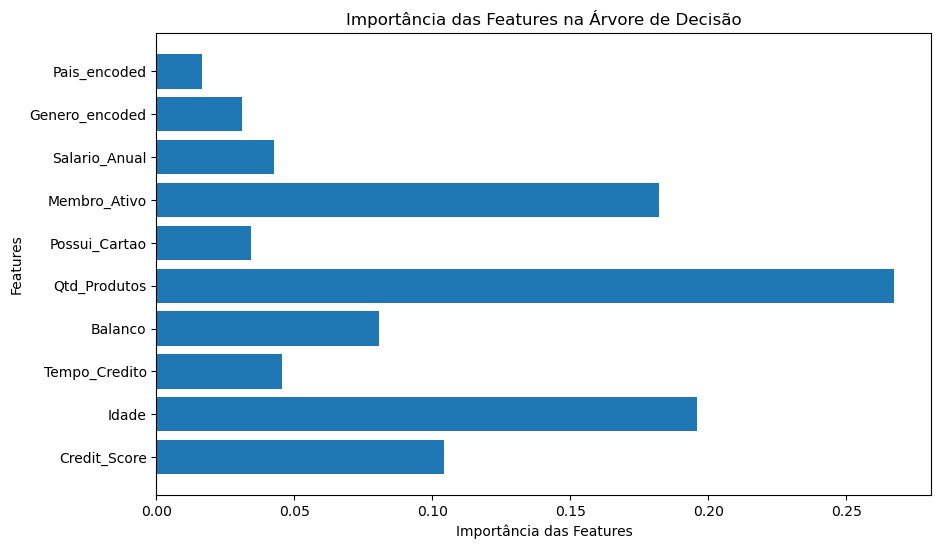

In [20]:
# Obtendo a importância das características do modelo de árvore de decisão
importancias_features = arvore_churn.feature_importances_

# Obtendo os nomes das características
nomes_features = X_train.columns

# Criando um gráfico de barras para visualizar a importância das características
plt.figure(figsize=(10, 6))
plt.barh(nomes_features, importancias_features)
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features na Árvore de Decisão')
plt.show()

Visualizar as features com maior peso em um modelo de árvore de decisão ou qualquer outro modelo de aprendizado de máquina é uma etapa crucial na análise do modelo e na compreensão de como ele está tomando suas decisões. Aqui estão algumas razões pelas quais isso é importante:

Interpretabilidade do Modelo: Entender quais features são mais importantes para o modelo pode ajudar a interpretar como o modelo está tomando suas decisões. Isso pode ser especialmente útil em casos em que é importante entender os fatores que influenciam as previsões do modelo.
Seleção de Features: Ao identificar as features mais importantes, você pode decidir se deseja manter apenas as features mais relevantes e descartar as menos importantes. Isso pode ajudar a simplificar o modelo e reduzir a dimensionalidade dos dados, o que pode levar a um modelo mais simples e eficiente.

**Vamos refinar nosso modelo apenas com as 3 principais features e verificar como fica nosso desempenho e nossa árvore.**

In [21]:
X_train_reduzido = X_train[['Qtd_Produtos', 'Membro_Ativo', 'Idade']]
X_test_reduzido = X_test[['Qtd_Produtos', 'Membro_Ativo', 'Idade']]

In [22]:
arvore_churn_reduzido = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
arvore_churn_reduzido.fit(X_train_reduzido, y_train)

DecisionTreeClassifier(random_state=0)

In [23]:
previsoes_reduzido = arvore_churn_reduzido.predict(X_test_reduzido)

In [24]:
relatorio = classification_report(y_test, previsoes_reduzido)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     19649
         1.0       0.74      0.48      0.59      5278

    accuracy                           0.85     24927
   macro avg       0.81      0.72      0.75     24927
weighted avg       0.84      0.85      0.84     24927



* Para a classe 0 (0.0): A precisão melhorou para 87%, o que significa que 87% das amostras previstas como pertencentes à classe 0 realmente são da classe 0.
* Para a classe 1 (1.0): A precisão também melhorou para 74%, indicando que 74% das amostras previstas como pertencentes à classe 1 realmente são da classe 1.

* Para a classe 0 (0.0): A revocação melhorou para 95%, indicando que o modelo identificou corretamente 95% das amostras da classe 0.
* Para a classe 1 (1.0): A revocação piorou para 48%, indicando que o modelo identificou corretamente 48% das amostras da classe 1.

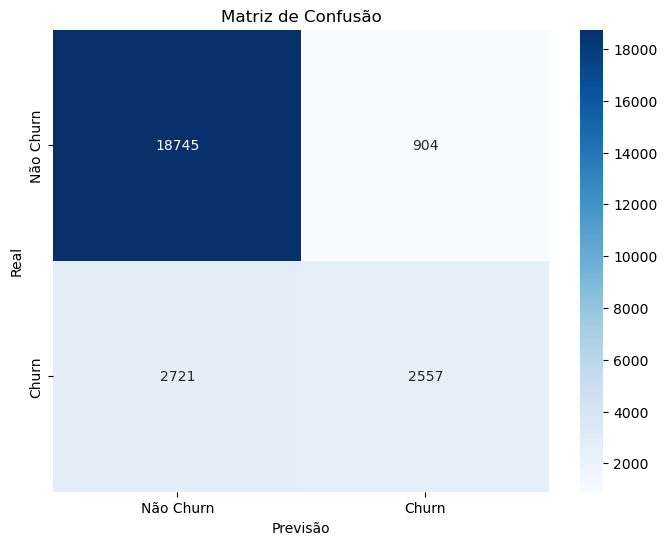

In [25]:
matriz_confusao = confusion_matrix(y_test, previsoes_reduzido)

# Plotando a matriz de confusão como um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Não Churn', 'Churn'],
            yticklabels=['Não Churn', 'Churn'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

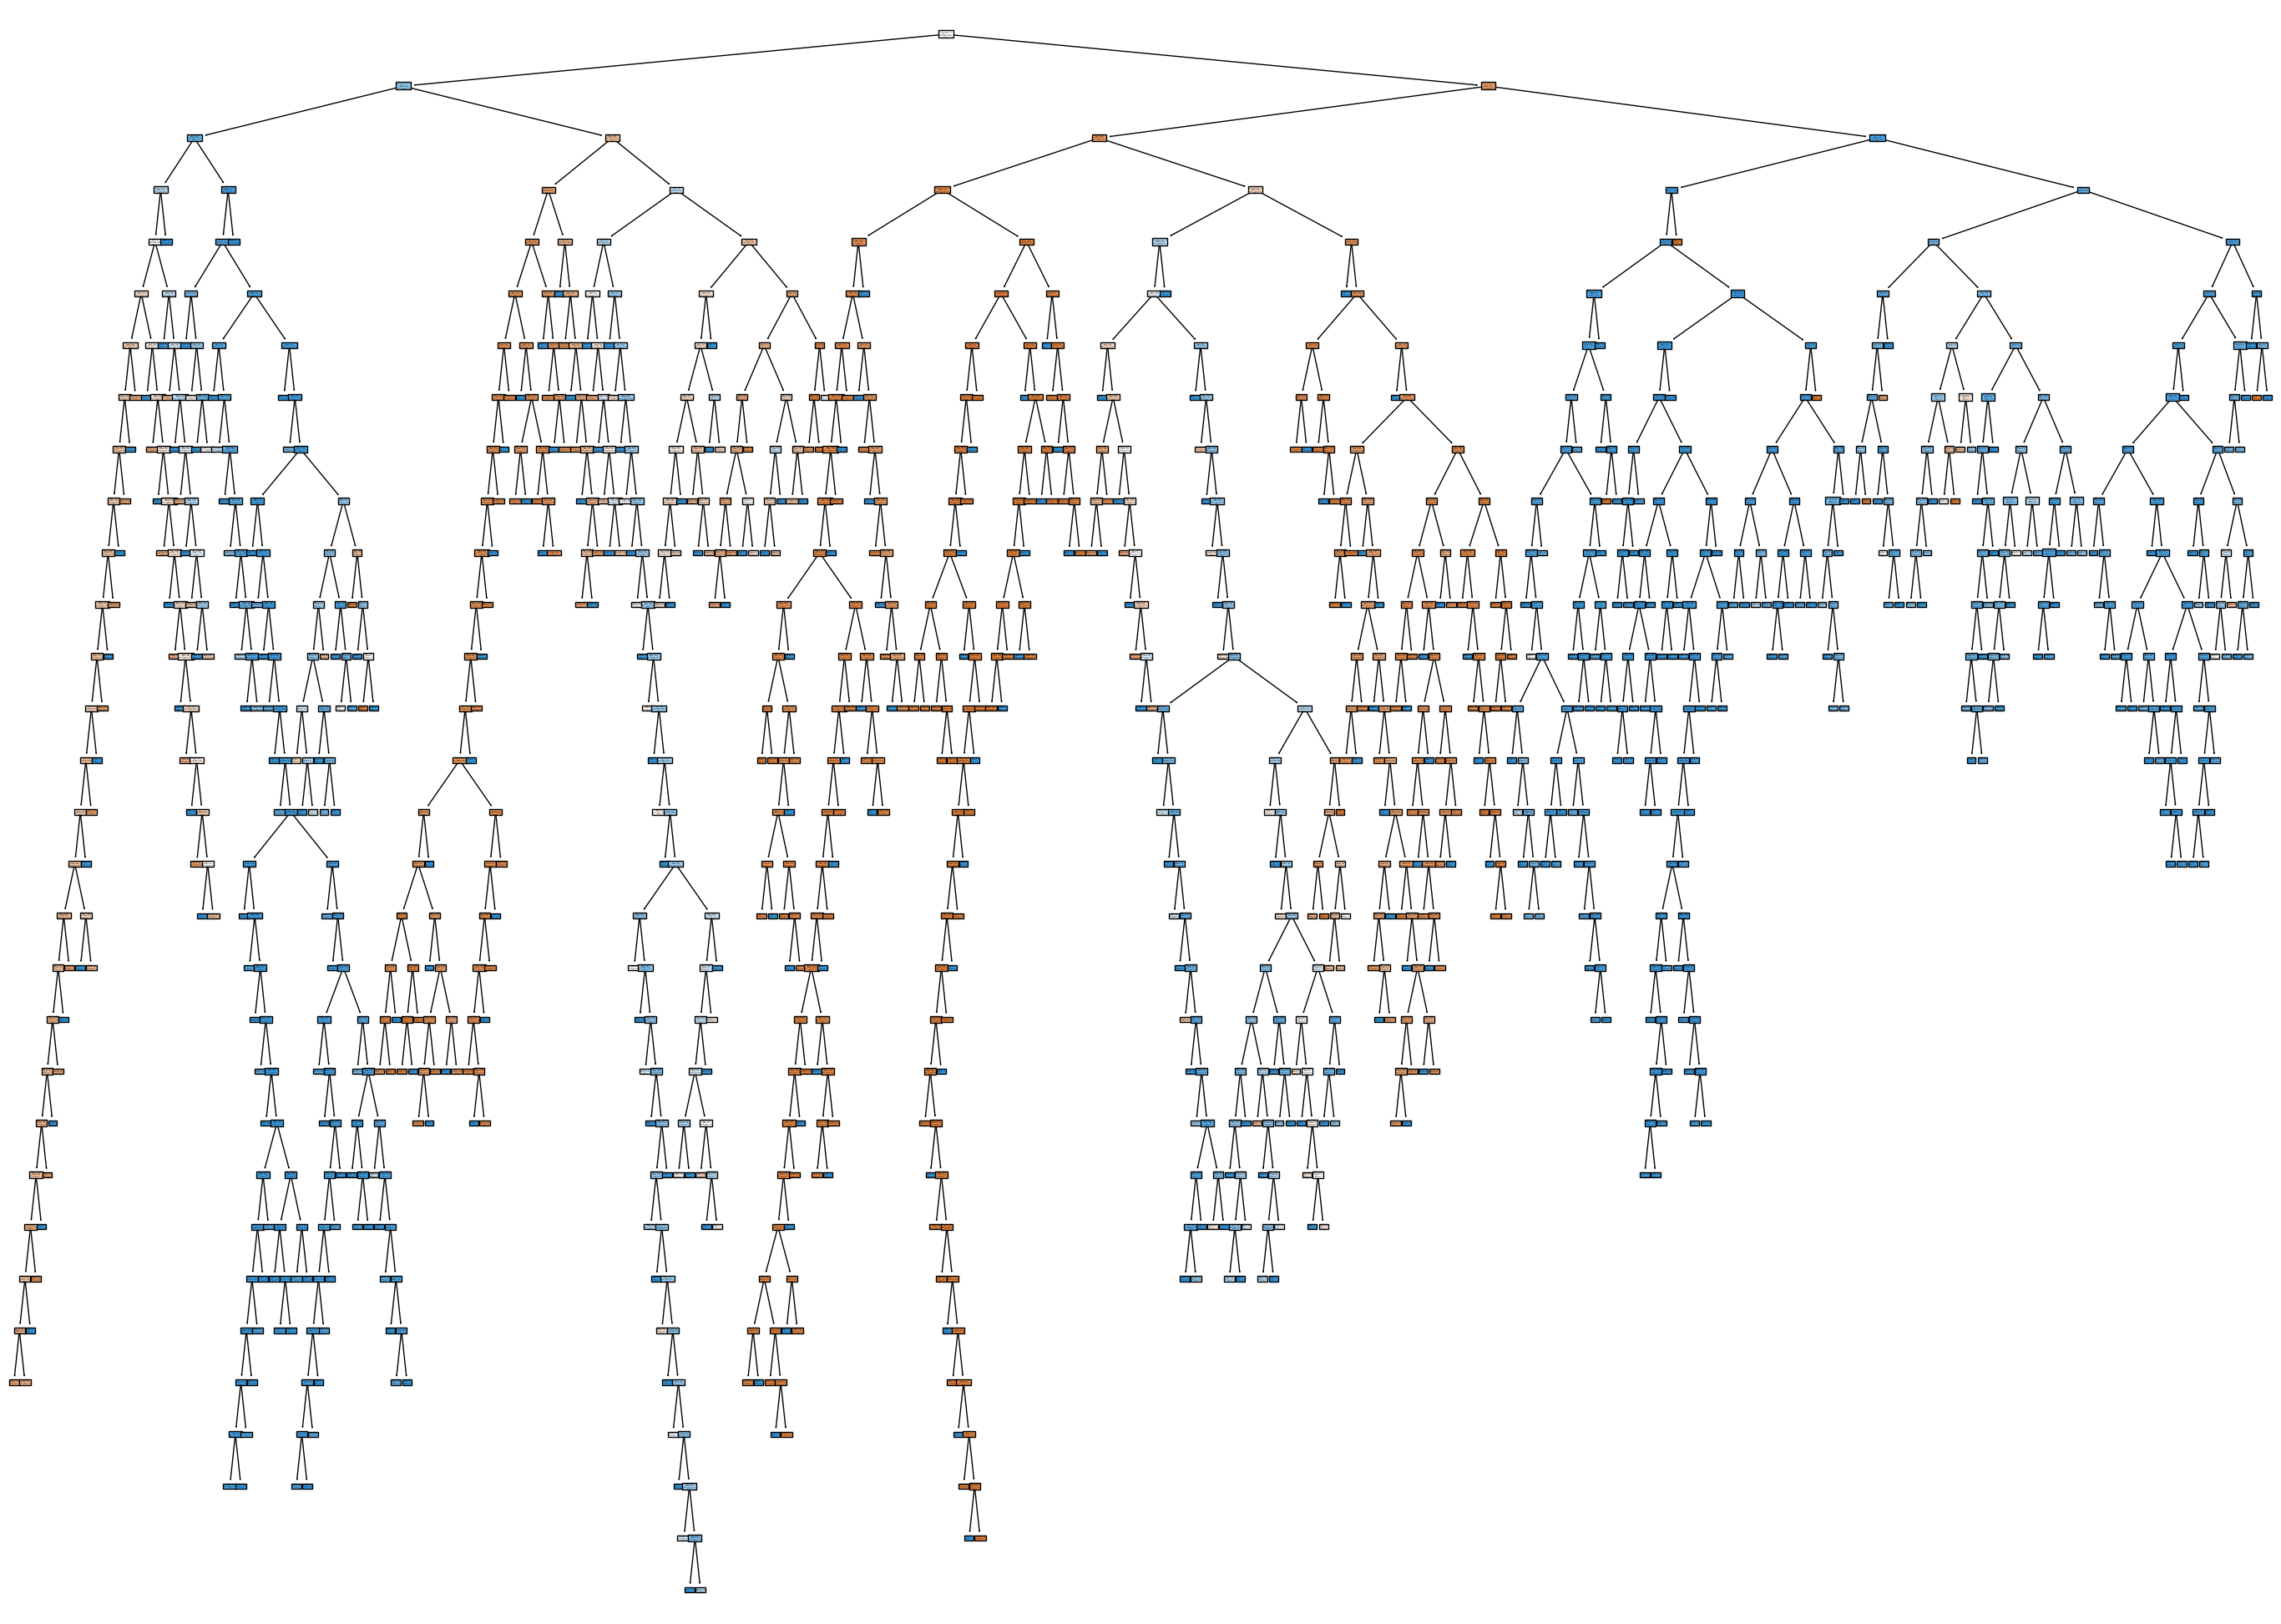

In [26]:
plt.figure(figsize=(35,25))
plot_tree(arvore_churn_reduzido, filled=True, feature_names=X_train_reduzido.columns, class_names=['0', '1'])
plt.show()

Para finalizarmos nossa aula, gostaria de demonstrar como é a visualização dos nosso quadros na arvore e a interpretação e demonstrar para vocês como seria a construção de uma árvore com menores profundidades.

In [27]:
# Criamos um modelo de árvore de decisão com profundidade 1
arvore_profundidade_1 = DecisionTreeClassifier(max_depth=1, random_state=0)
arvore_profundidade_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=0)

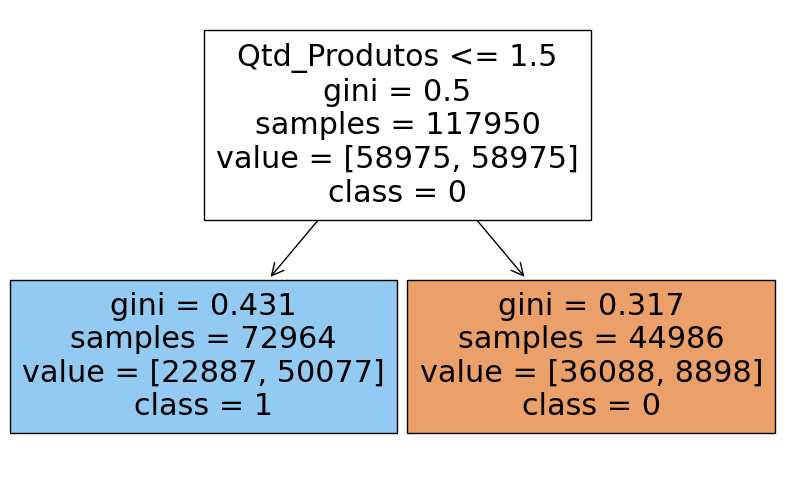

In [28]:
plt.figure(figsize=(10, 6))
plot_tree(arvore_profundidade_1, filled=True, feature_names=X_train.columns, class_names=['0', '1'])
plt.show()

Neste exemplo, max_depth=1 cria uma árvore de decisão com apenas um nível (a raiz e uma divisão). Notem que ele usou a feature de maior importancia, o melhor valor de Gini.

Na representação visual de uma árvore de decisão, os valores que aparecem dentro dos colchetes, especificamente sob o atributo value, fornecem informações sobre a distribuição das classes (ou categorias) de destino em um nó específico da árvore.
[200, 150] -> Isso significa que há 200 exemplos de treinamento nesse nó e, desses, 150 são da classe 0 e 50 são da classe 1.


Interpretar uma árvore de decisão é crucial para compreender como o modelo toma decisões, identificar padrões nos dados, ajustar o modelo adequadamente, comunicar resultados de forma clara e garantir a confiabilidade do modelo em diferentes contextos.







Mas notem que: Nosso problema acabou sendo muito complexo para uma árvore de decisão, um dos benefícios da árvore é a facilidade da interpretação mas um problema complexo como o nosso, com  diversas features e categorias, não permite uma fácil interpretação da árvore, por isso, nos aprofundaremos em modelos mais robustos.